In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os

import pandas as pd


from altaipony.flarelc import FlareLightCurve
from funcs.helper import read_custom_aperture_lc
from funcs.multiperiod import show_flare, find_period, remove_sinusoidal, fetch_lightcurve

/usr/lib/python3.6/importlib/_bootstrap_external.py:426: ImportWarning: Not importing directory /home/ekaterina/Documents/001_Science/Flares_in_Clusters_II/flaresinclustersii/lib/python3.6/site-packages/mpl_toolkits: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
CWD = "/".join(os.getcwd().split("/")[:-2])
lcs = pd.read_csv(f"{CWD}/data/summary/lcs.csv")
lcs

,ID,QCS,typ,cadence_min,mission,prefix,origin,h_mission,SpT,view_start,...,J,R,Gaia_G,vsini_kms,e_vsini_kms,Prot_d,sini,Ref,identifier,Rstar
0,100004076,14,slc,1,kep,KIC,generic,Kepler,L1,1356.50,...,13.078,NaN,17.8356,11.2,2.2,0.37015,>.59,Gizis+13,WISEP J190648.47+401106.8,0.107
1,212035340,18,llc,30,ktwo,EPIC,generic,K2,M8,3437.00,...,15.900,NaN,19.5667,NaN,NaN,0.19300,NaN,Paudel+19,MASS J08371832+2050349,0.111
2,237880881,1,slc,2,tess,TIC,generic,TESS,M5,1331.00,...,11.530,NaN,14.9796,14.4,2.6,0.35125,NaN,Kraus+14,2MASS J01180670-6258591,0.199
3,44984200,10,slc,2,tess,TIC,custom,TESS,M6,1587.25,...,10.309,15.08,14.4115,NaN,NaN,0.11300,NaN,this work,SCR J0838-5855,NaN
4,277539431,12,slc,2,tess,TIC,custom,TESS,M7,1641.00,...,10.630,NaN,14.7381,NaN,NaN,0.19000,NaN,this work,WISEA J105515.71-735611.3,NaN
5,300741820,8,slc,2,tess,TIC,generic,TESS,M6,1522.00,...,11.959,NaN,15.3277,NaN,NaN,0.13200,NaN,Zhan+19,UCAC4 116-015389,NaN


### Just show the flares and save the figures

In [ ]:
for i, row in lcs.iterrows():
    show_flare(row, save=True)

### Find the modulation period and plot periodograms

0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
0% (161/50160) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (119/2490) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
5% (119/2490) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


KIC 100004076 modulation period:  8.891125082196679 h
0.37046354509152823 d


10% (1972/20076) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
10% (1972/20076) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


EPIC 212035340 modulation period:  125.96681945928276 h
5.248617477470114 d
TIC 237880881 modulation period:  8.450034620486205 h
0.3520847758535919 d
TIC 44984200 modulation period:  121.37562122832581 h
5.057317551180242 d


11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).
11% (1987/17755) of the cadences will be ignored due to the quality mask (quality_bitmask=175).


TIC 277539431 modulation period:  4.557258266635865 h
0.18988576110982772 d
TIC 300741820 modulation period:  240.0 h
10.0 d


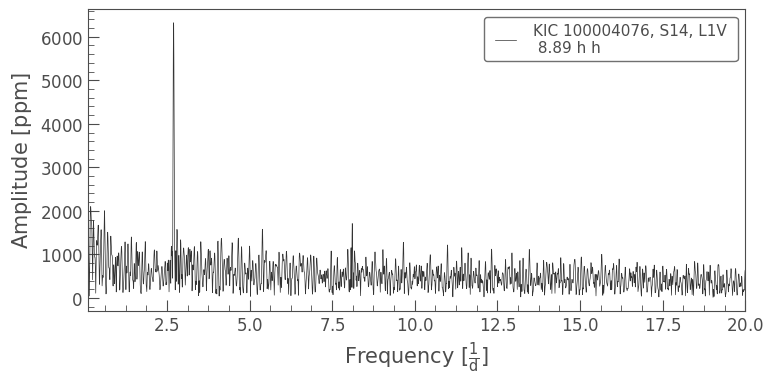

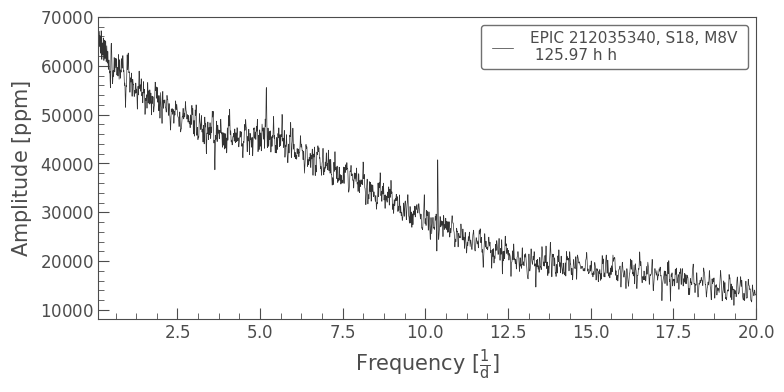

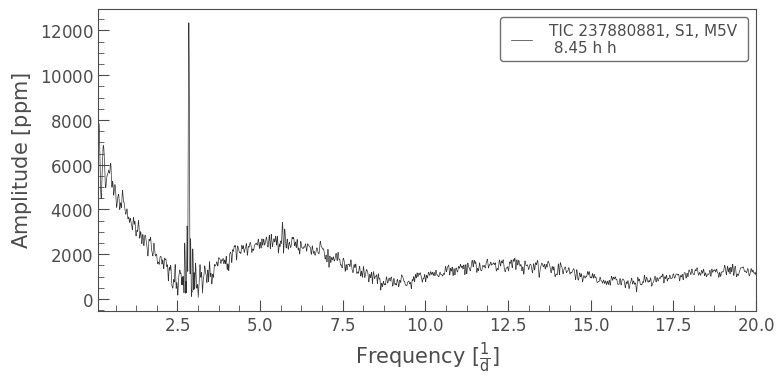

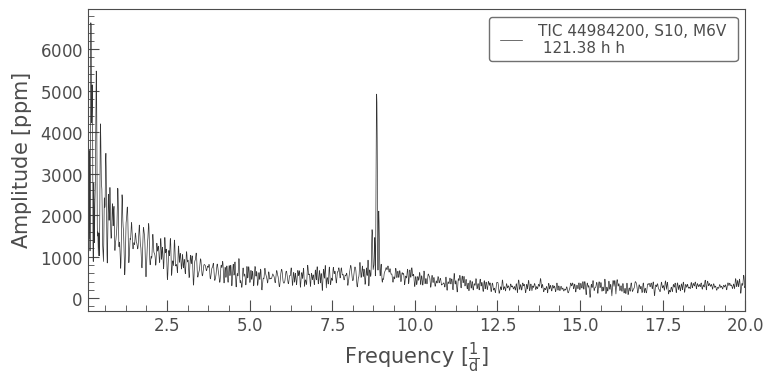

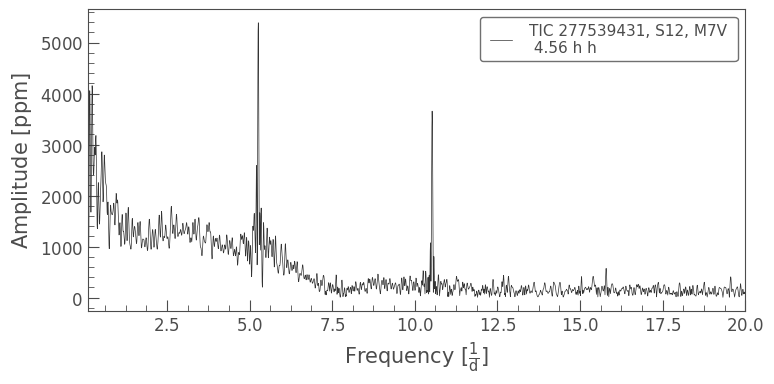

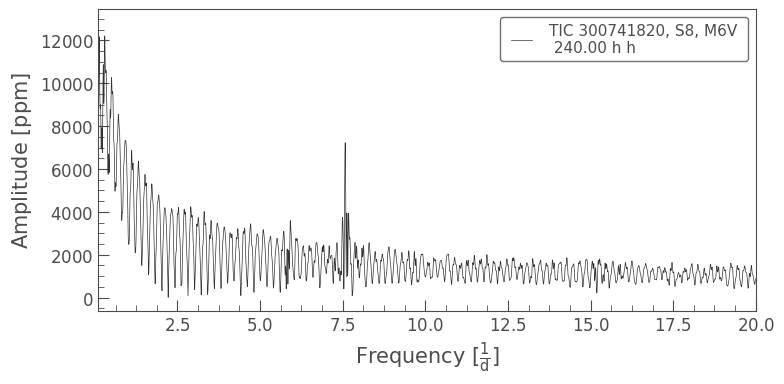

In [26]:
for i, row in lcs.iterrows():
    period, mfp = find_period(row, save=True, maxfreq=20)
    print(period.to("d"))

In [13]:
import astropy.units as u
4.56/2


2.28

No handles with labels found to put in legend.


TIC 44984200 modulation period:  2.712025530313231 h
Relative amplitude of modulation: 4.9e-03


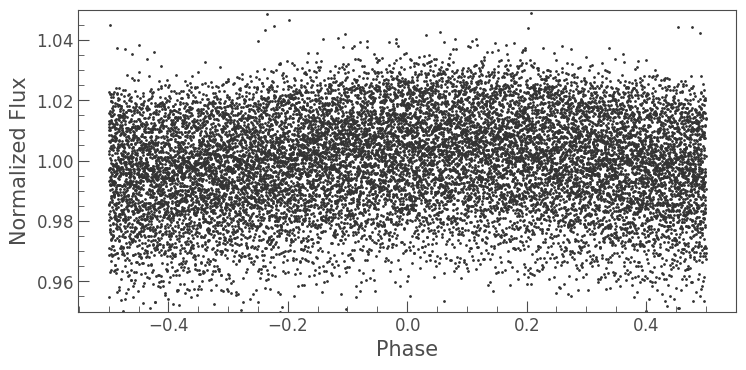

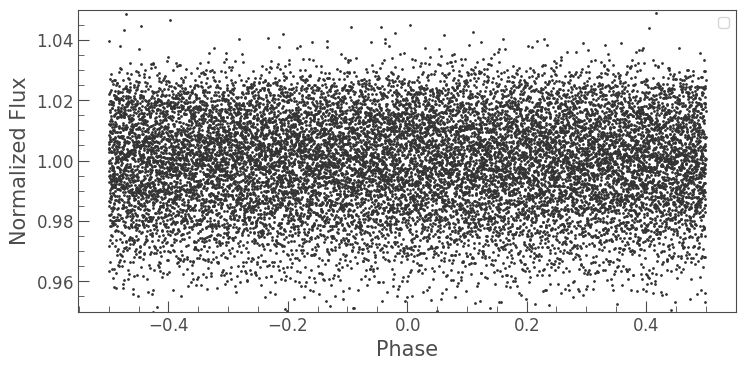

In [25]:

#for i, row in lcs.iterrows():
flc = fetch_lightcurve(lcs.loc[3])
pg = flc.remove_nans().to_periodogram(freq_unit=1/u.d,
                                              maximum_frequency=10,
                                              minimum_frequency=2)

folded = flc.fold(pg.period_at_max_power.to("d").value)
folded.scatter();
plt.ylim(.95,1.05);
t, flux, model, period = remove_sinusoidal(lcs.loc[3], plot=False, save=False)
newlc = FlareLightCurve(time=t, flux=flux, targetid=flc.targetid)
folded = flc.fold(pg.period_at_max_power.to("d").value/2)
folded.scatter();
plt.ylim(.95,1.05);
plt.legend()

## Fit a sinusoidal modulation and plot the residual

In [ ]:
for i, row in lcs.iterrows():
    t, s_flux, model, period = remove_sinusoidal(row, save=True)